In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE



# 🛠️ Feature engineering


# 💡 Define features and target


# 🧹 Handle missing values


# ✂️ Train-validation split

# ⚖️ Handle class imbalance with SMOTE

# 🔍 Hyperparameter tuning



# 🧪 Validation performance


# 📊 Classification report


# 📉 Confusion matrix

# ⭐ Feature importances

# 📤 Test Set Prediction + Submission
# <-- Update path if needed

# Make sure all required features are present
for col in features:
    if col not in test_df:
        test_df[col] = np.nan

# Generate engineered features for test set



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [4]:

df = pd.read_csv("/content/Train_Data.csv")
df['age_group'] = df['age_group'].astype(str).str.strip()
df = df[df['age_group'].isin(['Adult', 'Senior'])]
df['age_group'] = df['age_group'].map({'Adult': 0, 'Senior': 1}).astype(int)


In [6]:
features = ['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']
df['glucose_per_bmi'] = df['LBXGLU'] / (df['BMXBMI'] + 1)
df['insulin_per_bmi'] = df['LBXIN'] / (df['BMXBMI'] + 1)
df['glucose_tolerance_ratio'] = df['LBXGLU'] / (df['LBXGLT'] + 1)
features += ['glucose_per_bmi', 'insulin_per_bmi', 'glucose_tolerance_ratio']

In [7]:
X = df[features]
y = df['age_group']

In [8]:
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)


In [10]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [11]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

In [12]:
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid.fit(X_resampled, y_resampled)

clf = grid.best_estimator_


In [13]:
y_pred = clf.predict(X_val)
f1 = f1_score(y_val, y_pred)
print("Best GridSearch F1 Score on Resampled Train:", grid.best_score_)
print("F1 Score on Validation Set:", round(f1, 4))

Best GridSearch F1 Score on Resampled Train: 0.8994977728854077
F1 Score on Validation Set: 0.2645


In [14]:
print(classification_report(y_val, y_pred, target_names=['Adult', 'Senior']))

              precision    recall  f1-score   support

       Adult       0.86      0.87      0.87       328
      Senior       0.28      0.25      0.26        63

    accuracy                           0.77       391
   macro avg       0.57      0.56      0.56       391
weighted avg       0.76      0.77      0.77       391



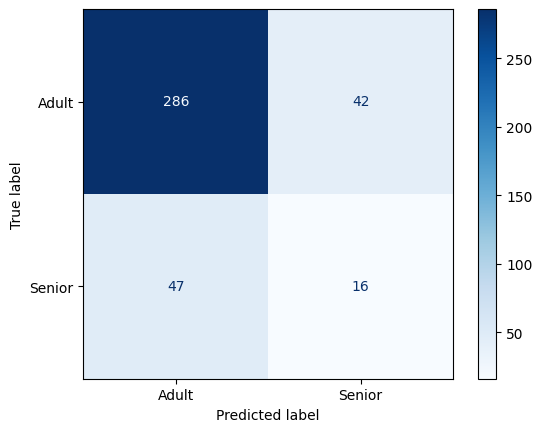

In [15]:
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Adult', 'Senior'])
disp.plot(cmap='Blues')
plt.show()


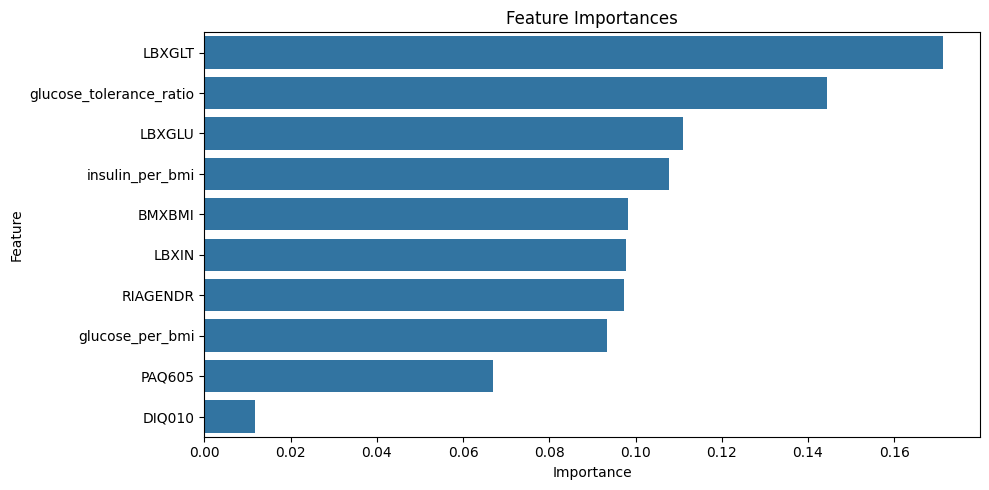

In [16]:
importances = clf.feature_importances_
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


In [17]:
test_df = pd.read_csv("/content/Test_Data.csv")

In [20]:
test_df['glucose_per_bmi'] = test_df['LBXGLU'] / (test_df['BMXBMI'] + 1)
test_df['insulin_per_bmi'] = test_df['LBXIN'] / (test_df['BMXBMI'] + 1)
test_df['glucose_tolerance_ratio'] = test_df['LBXGLU'] / (test_df['LBXGLT'] + 1)


test_X = imputer.transform(test_df[features])
test_preds = clf.predict(test_X)

submission = pd.DataFrame({
    "SEQN": test_df["SEQN"],
    "Prediction": test_preds
})
submission.to_csv("submission.csv", index=False)
print("✅ submission.csv created")

✅ submission.csv created
